In [1]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandapower as pp
import pandapower.networks as net
import pandapower.topology as top
import pandapower.plotting as plot
import pandapower.converter
import pandapower.estimation

import time

pd.set_option('display.max_columns', 100)

import julia
julia.install()


import save_outputs

# Power System - case39

In [2]:
net = pandapower.networks.case39()
net

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - gen (9 elements)
   - ext_grid (1 element)
   - line (35 elements)
   - trafo (11 elements)
   - poly_cost (10 elements)
   - bus_geodata (39 elements)

In [3]:
net.bus = net.bus.sort_index()
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,345.0,2
1,True,1.06,0.94,2,b,345.0,2
2,True,1.06,0.94,3,b,345.0,2
3,True,1.06,0.94,4,b,345.0,1
4,True,1.06,0.94,5,b,345.0,1
5,True,1.06,0.94,6,b,345.0,1
6,True,1.06,0.94,7,b,345.0,1
7,True,1.06,0.94,8,b,345.0,1
8,True,1.06,0.94,9,b,345.0,1
9,True,1.06,0.94,10,b,345.0,1


In [4]:
net.load = net.load.sort_index()
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,0,0.0,0.0,False,True,None,97.60,44.2,1.0,NaN,None
1,2,0.0,0.0,False,True,None,322.00,2.4,1.0,NaN,None
2,3,0.0,0.0,False,True,None,500.00,184.0,1.0,NaN,None
3,6,0.0,0.0,False,True,None,233.80,84.0,1.0,NaN,None
4,7,0.0,0.0,False,True,None,522.00,176.6,1.0,NaN,None
5,8,0.0,0.0,False,True,None,6.50,-66.6,1.0,NaN,None
6,11,0.0,0.0,False,True,None,8.53,88.0,1.0,NaN,None
7,14,0.0,0.0,False,True,None,320.00,153.0,1.0,NaN,None
8,15,0.0,0.0,False,True,None,329.00,32.3,1.0,NaN,None
9,17,0.0,0.0,False,True,None,158.00,30.0,1.0,NaN,None


In [5]:
pp.create_sgen(net, bus=1, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=11, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=14, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=21, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=23, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=28, p_mw=210, q_mvar=70, controllable=False)

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable
0,None,1,210.0,70.0,NaN,1.0,True,wye,True,False
1,None,11,210.0,70.0,NaN,1.0,True,wye,True,False
2,None,14,210.0,70.0,NaN,1.0,True,wye,True,False
3,None,21,210.0,70.0,NaN,1.0,True,wye,True,False
4,None,23,210.0,70.0,NaN,1.0,True,wye,True,False
5,None,28,210.0,70.0,NaN,1.0,True,wye,True,False


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,29,True,True,None,250.0,1.0,NaN,None,1.0499,False,1040.0,0.0,400.0,140.0
1,31,True,True,None,650.0,1.0,NaN,None,0.9841,False,725.0,0.0,300.0,150.0
2,32,True,True,None,632.0,1.0,NaN,None,0.9972,False,652.0,0.0,250.0,0.0
3,33,True,True,None,508.0,1.0,NaN,None,1.0123,False,508.0,0.0,167.0,0.0
4,34,True,True,None,650.0,1.0,NaN,None,1.0494,False,687.0,0.0,300.0,-100.0
5,35,True,True,None,560.0,1.0,NaN,None,1.0636,False,580.0,0.0,240.0,0.0
6,36,True,True,None,540.0,1.0,NaN,None,1.0275,False,564.0,0.0,250.0,0.0
7,37,True,True,None,830.0,1.0,NaN,None,1.0265,False,865.0,0.0,300.0,-150.0
8,38,True,True,None,1000.0,1.0,NaN,None,1.0300,False,1100.0,0.0,300.0,-100.0


In [7]:
net.ext_grid 

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,30,True,None,0.0,0.982,646.0,0.0,300.0,-100.0


In [8]:
net.line = net.line.sort_index()
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,1557.117675,1.0,0,0.0,True,1.0,1.004087,100.0,None,1,4.165875,None,1,ol,48.919275
1,1671.444477,1.0,0,0.0,True,1.0,1.673479,100.0,None,1,1.190250,None,38,ol,29.756250
2,573.194026,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,2,ol,17.972775
3,325.374525,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,8.331750,None,24,ol,10.236150
4,493.410410,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,3,ol,25.352325
5,476.473106,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.309275,None,17,ol,15.830325
6,299.077132,1.0,3,0.0,True,1.0,1.004087,100.0,None,1,0.952200,None,4,ol,15.235200
7,307.991502,1.0,3,0.0,True,1.0,0.836740,100.0,None,1,0.952200,None,13,ol,15.354225
8,96.720920,1.0,4,0.0,True,1.0,2.008175,100.0,None,1,0.238050,None,5,ol,3.094650
9,328.940273,1.0,4,0.0,True,1.0,1.506131,100.0,None,1,0.952200,None,7,ol,13.330800


In [9]:
net.trafo = net.trafo.sort_index()
net.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,sn_mva,std_type,tap_max,tap_neutral,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,1,0.0,True,29,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,16.290000,0.00
1,1.0,5,0.0,True,30,100.0,None,1,0.0,0.0,1800.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,45.000000,0.00
2,1.0,9,0.0,True,31,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,18.000000,0.00
3,1.0,11,0.0,True,10,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
4,1.0,11,0.0,True,12,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
5,1.0,18,0.0,True,19,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,6.0,345.0,345.0,12.435968,0.63
6,1.0,18,0.0,True,32,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,12.795519,0.63
7,1.0,19,0.0,True,33,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,0.9,345.0,345.0,16.220237,0.81
8,1.0,21,0.0,True,34,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,12.870000,0.00
9,1.0,24,0.0,True,36,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,20.886982,0.54


In [10]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,gen,0.2,0.3,0.01,0.0,0.0,0.0
1,0,ext_grid,0.2,0.3,0.01,0.0,0.0,0.0
2,1,gen,0.2,0.3,0.01,0.0,0.0,0.0
3,2,gen,0.2,0.3,0.01,0.0,0.0,0.0
4,3,gen,0.2,0.3,0.01,0.0,0.0,0.0
5,4,gen,0.2,0.3,0.01,0.0,0.0,0.0
6,5,gen,0.2,0.3,0.01,0.0,0.0,0.0
7,6,gen,0.2,0.3,0.01,0.0,0.0,0.0
8,7,gen,0.2,0.3,0.01,0.0,0.0,0.0
9,8,gen,0.2,0.3,0.01,0.0,0.0,0.0


In [11]:
net.bus_geodata = net.bus_geodata.sort_index()
net.bus_geodata['x'] = pd.Series([-4,-3,-3,-3,-4,-4,-5,-5,-5,-2,-3,-2,-1,-1,-1,1,-1,-2,2,0,3,4,4,3,-2,0,0,2,4,-3,-4,-2,2,0,5,4,-2,4,-5])
net.bus_geodata['y'] = pd.Series([1,2,0,-1,-2,-5,-4,-3,-2,-4,-3,-2,-3,-1,0,1,1,1,-3,-4,1,-1,-5,-2,3,3,2,3,3,4,-6,-6,-6,-6,-1,-6,4,1,0])
net.bus_geodata

,x,y,coords
0,-4,1,None
1,-3,2,None
2,-3,0,None
3,-3,-1,None
4,-4,-2,None
5,-4,-5,None
6,-5,-4,None
7,-5,-3,None
8,-5,-2,None
9,-2,-4,None


Arc: Arc(xy=(-2.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(2.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(0.450029, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(5.45003, -1.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, 0.912212), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-4.54997, -0.087788), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)


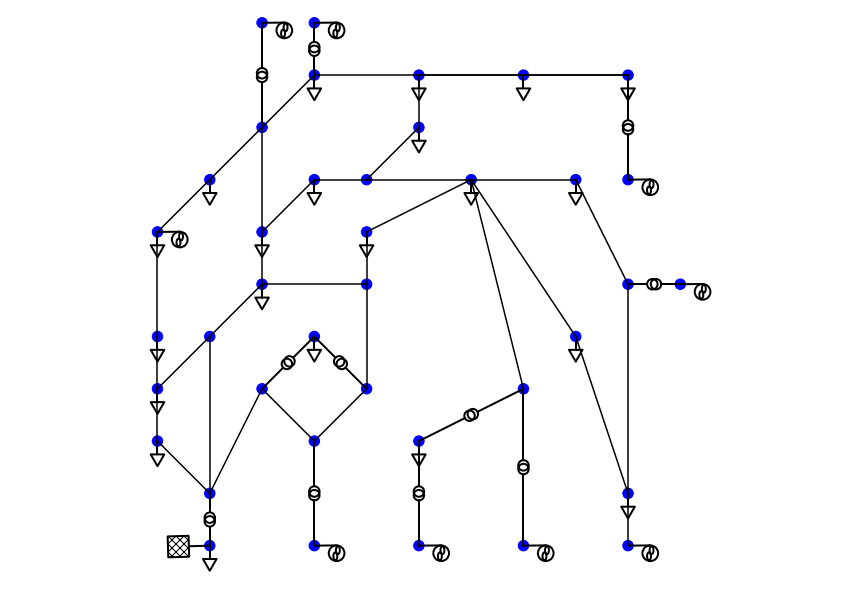

In [12]:
import pylab


def plot_grid():
    bus_col = plot.create_bus_collection(net, color="b", size=0.1, picker=True)
    trafo_col = plot.create_trafo_collection(net, size=0.1)
    line_col = plot.create_line_collection(net, color="k", use_bus_geodata=True)
    ext_grid_col = plot.create_ext_grid_collection(net, size=0.2, orientation=-1.6)
    load_col = plot.create_load_collection(net, size=0.15, orientation=np.pi)
    gen_col = plot.create_gen_collection(net, size=0.15, orientation=1.9)
    #sgen_col = plt.create_sgen_collection(net, size=0.1, infofunc=None, orientation=np.pi)
    plot.draw_collections([bus_col, trafo_col, line_col,
                          ext_grid_col, load_col, gen_col], figsize=(12, 8.5))
    pylab.show()

plot_grid()

# PF

In [13]:
input_dict = save_outputs.load_model('inputs\IEEE39_TA1_hybrid')

x_d = np.array(input_dict['xd'])
xd_std = np.array(input_dict['xd_std'])
u = np.array(input_dict['u'])

In [15]:
X_d = x_d
P_cont = u

In [16]:
n_loads=21

# Load base
L_P_base = net.load['p_mw']
L_Q_base = net.load['q_mvar']

# RS base
RS_P_base = net.sgen['p_mw']
RS_Q_base = net.sgen['q_mvar']

# Load factor
faktor_load = L_Q_base/L_P_base
# RS factor
faktor_rs = RS_Q_base/RS_P_base

In [17]:
n = net.gen.shape[0]
np.random.seed(123)

V_m = pd.DataFrame([])
V_deg = pd.DataFrame([])
P = pd.DataFrame([])
Q = pd.DataFrame([])

P_ij = pd.DataFrame([])


Pg = pd.DataFrame()
Pg_0 = pd.DataFrame()
load_p = pd.DataFrame()
load_q = pd.DataFrame()
rs_p = pd.DataFrame()
rs_q = pd.DataFrame()

count = P_cont.shape[0]

t1 = time.time()
for j in range(count):

    n_sim = 1
    
    for i in range(n_sim):
        net.load['p_mw'] = pd.Series(X_d[j,:n_loads].flatten())
        net.sgen['p_mw'] = pd.Series(X_d[j,n_loads:].flatten())
    
        net.load['q_mvar'] = pd.Series(net.load['p_mw'] * faktor_load)
        net.sgen['q_mvar'] = pd.Series(net.sgen['p_mw'] * faktor_rs)
        
        load_p = pd.concat([load_p, net.load['p_mw']], axis=1)
        load_q = pd.concat([load_q, net.load['q_mvar']], axis=1)
        
        rs_p = pd.concat([rs_p, net.sgen['p_mw']], axis=1)
        rs_q = pd.concat([rs_q, net.sgen['q_mvar']], axis=1)
        
        
        
        net.ext_grid['p_mw'] = pd.Series(P_cont[j, 0].flatten())
        
        net.gen['p_mw'] = pd.Series(P_cont[j, 1:].flatten())
    
        Pg_0 = pd.concat([Pg_0, net.ext_grid['p_mw']], axis=1)
        Pg = pd.concat([Pg, net.gen['p_mw']], axis=1)
    
        pp.runpp(net)
    
        V_m = V_m.append(pd.DataFrame(net.res_bus['vm_pu']).T)
        V_deg = V_deg.append(pd.DataFrame(net.res_bus['va_degree']).T)
        P = P.append(pd.DataFrame(net.res_bus['p_mw']).T)
        Q = Q.append(pd.DataFrame(net.res_bus['q_mvar']).T)
        
        P_ij = P_ij.append(pd.DataFrame(net.res_line['p_from_mw']).T)
    
        if i == (n_sim-1):
            V_m = V_m.reset_index(drop=True)
            V_deg = V_deg.reset_index(drop=True)
            P = P.reset_index(drop=True)
            Q = Q.reset_index(drop=True)
            P_ij = P_ij.reset_index(drop=True)
            
            
t2 = time.time()

t = t2 - t1 
print('Time of solver:', t)

Time of solver: 3.8985092639923096


# Dataset

In [18]:
load_p = load_p.transpose()
load_p = load_p.reset_index()
load_p = load_p.drop(['index'], axis=1)
load_p.columns = ['Load_P1', 'Load_P2' ,'Load_P3','Load_P4', 'Load_P5' ,'Load_P6','Load_P7', 'Load_P8' ,'Load_P9',
                  'Load_P10', 'Load_P11' ,'Load_P12','Load_P13', 'Load_P14' ,'Load_P15','Load_P16', 'Load_P17' ,'Load_P18',
                  'Load_P19' ,'Load_P20', 'Load_P21']

rs_p = rs_p.transpose()
rs_p = rs_p.reset_index()
rs_p = rs_p.drop(['index'], axis=1)
rs_p.columns = ['RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']


load_q = load_q.transpose()
load_q = load_q.reset_index()
load_q = load_q.drop(['index'], axis=1)
load_q.columns = ['Load_Q1', 'Load_Q2' ,'Load_Q3','Load_Q4', 'Load_Q5' ,'Load_Q6','Load_Q7', 'Load_Q8' ,'Load_Q9',
                  'Load_Q10', 'Load_Q11' ,'Load_Q12','Load_Q13', 'Load_Q14' ,'Load_Q15','Load_Q16', 'Load_Q17' ,'Load_Q18',
                  'Load_Q19' ,'Load_Q20', 'Load_Q21']

rs_q = rs_q.transpose()
rs_q = rs_q.reset_index()
rs_q = rs_q.drop(['index'], axis=1)
rs_q.columns = ['RS_Q1', 'RS_Q2', 'RS_Q3', 'RS_Q4', 'RS_Q5', 'RS_Q6']

In [19]:
Pg0 = pd.DataFrame(Pg_0.iloc[0])
Pg1 = pd.DataFrame(Pg.iloc[0])
Pg2 = pd.DataFrame(Pg.iloc[1])
Pg3 = pd.DataFrame(Pg.iloc[2])
Pg4 = pd.DataFrame(Pg.iloc[3])
Pg5 = pd.DataFrame(Pg.iloc[4])
Pg6 = pd.DataFrame(Pg.iloc[5])
Pg7 = pd.DataFrame(Pg.iloc[6])
Pg8 = pd.DataFrame(Pg.iloc[7])
Pg9 = pd.DataFrame(Pg.iloc[8])

Pg0 = Pg0.reset_index()
Pg0 = Pg0.drop(['index'], axis=1)
Pg0.columns = ['Pg0']

Pg1 = Pg1.reset_index()
Pg1 = Pg1.drop(['index'], axis=1)
Pg1.columns = ['Pg1']

Pg2 = Pg2.reset_index()
Pg2 = Pg2.drop(['index'], axis=1)
Pg2.columns = ['Pg2']

Pg3 = Pg3.reset_index()
Pg3 = Pg3.drop(['index'], axis=1)
Pg3.columns = ['Pg3']

Pg4 = Pg4.reset_index()
Pg4 = Pg4.drop(['index'], axis=1)
Pg4.columns = ['Pg4']

Pg5 = Pg5.reset_index()
Pg5 = Pg5.drop(['index'], axis=1)
Pg5.columns = ['Pg5']


Pg6 = Pg6.reset_index()
Pg6 = Pg6.drop(['index'], axis=1)
Pg6.columns = ['Pg6']


Pg7 = Pg7.reset_index()
Pg7 = Pg7.drop(['index'], axis=1)
Pg7.columns = ['Pg7']


Pg8 = Pg8.reset_index()
Pg8 = Pg8.drop(['index'], axis=1)
Pg8.columns = ['Pg8']

Pg9 = Pg9.reset_index()
Pg9 = Pg9.drop(['index'], axis=1)
Pg9.columns = ['Pg9']

In [20]:
Q = Q.iloc[:, 29:]
Q.columns = ['Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38']

V_m = V_m.iloc[:, :29]
V_m.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18',
               'U19', 'U20', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27','U28']
P_ij.columns = ['P_0_1', 'P_0_38', 'P_1_2', 'P_1_24', 'P_2_3', 'P_2_17', 'P_3_4', 'P_3_13', 'P_4_5', 'P_4_7', 'P_5_6', 'P_5_10', 'P_6_7',
                'P_7_8', 'P_8_38', 'P_9_10', 'P_9_12', 'P_12_13', 'P_13_14', 'P_14_15', 'P_15_16', 'P_15_18', 'P_15_20', 'P_15_23', 'P_16_17', 'P_16_26',
                'P_20_21', 'P_21_22','P_22_23', 'P_22_35', 'P_24_25', 'P_25_26', 'P_25_27', 'P_25_28', 'P_27_28']

In [21]:
df = pd.concat([Pg0, Pg1, Pg2, Pg3, Pg4, Pg5, Pg6, Pg7, Pg8, Pg9, load_p, load_q, rs_p, rs_q, Q, V_m, P_ij], axis=1)

In [22]:
pd.set_option('display.max_columns', 200)
df.head(10)

,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
0,501.094176,501.094176,501.094176,501.094176,491.479177,501.094176,498.304122,496.787468,501.094176,501.094176,97.6,322.0,500.0,233.8,522.0,6.5,8.53,320.0,329.0,158.0,680.0,274.0,247.5,308.6,224.0,139.0,281.0,206.0,283.5,9.2,1104.0,44.2,2.4,184.0,84.0,176.6,-66.6,88.0,153.0,32.3,30.0,103.0,115.0,84.6,-92.2,47.2,17.0,75.5,27.6,26.9,4.6,250.0,210.0,210.0,210.0,210.0,210.0,210.0,70.0,70.0,70.0,70.0,70.0,70.0,-125.765369,-160.967935,-129.351051,-48.679385,-139.901292,-99.357275,-42.201715,27.079297,108.005949,101.80236,1.032769,1.057637,1.042822,1.01716,1.015348,1.017433,1.00603,1.004803,1.038169,1.030635,1.026006,1.031015,1.030034,1.028559,1.040946,1.052565,1.051478,1.046858,1.058554,0.995703,1.049435,1.064062,1.058143,1.060932,1.062736,1.067564,1.054746,1.068323,1.067904,-471.603487,374.003487,390.184519,-158.005369,147.448413,-81.108046,-19.228008,-333.751673,-477.921194,458.68844,539.633361,-481.752747,304.083196,238.730868,230.718047,371.762535,129.331641,218.297154,-116.750285,-227.020975,332.340211,-306.878059,-352.36008,-229.642532,239.554597,92.087265,-627.276899,80.941384,330.585831,-497.198756,111.526792,189.53496,-83.959298,-133.419112,-290.227323


# Save

In [23]:
df.to_csv(module_path + '\\IEEE39\\datasets\\dataset_tested_real_AC.csv')